In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
print("All files extensions have been added successfully")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

All files extensions have been added successfully


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import os
import PIL

2024-06-18 07:49:09.811334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 07:49:09.811469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 07:49:09.982255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train = tf.keras.utils.image_dataset_from_directory('/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train', image_size=(32, 32))

Found 100000 files belonging to 2 classes.


In [4]:
train_data = []
for pic,num in train:
    for j in range(32):
        train_data.append([pic[j],num[j]])

In [5]:
Type=['FAKE','REAL']
val={'FAKE':0,'REAL':1}
image_dir = '/kaggle/input/images1/images'
lis=[]
train_data1 = []
for categ in Type:
    Files=os.listdir(image_dir+"/"+categ)
    i=1
    for file in Files:
        imgpath=os.path.join(image_dir+"/"+categ,file)
        lis.append(imgpath)
        image=cv.imread(imgpath)
        img=cv.imread(str(lis[-1]))
        try:
            new_img=cv.resize(img,(32,32))
            train_data1.append([new_img,val[categ]])
        except:
            print("Not able to preprocess")
        print(i)
        i=i+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450


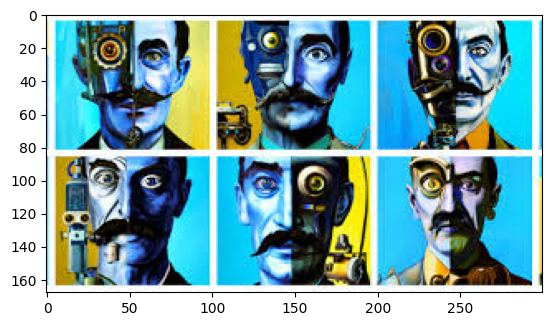

In [6]:
plt.imshow(cv.imread(lis[0]))

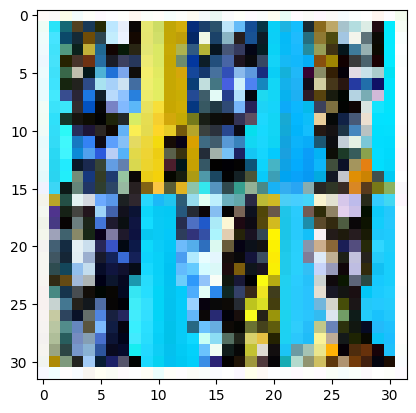

In [7]:
plt.imshow(train_data1[0][0])

In [8]:
import random
random.shuffle(train_data1)
random.shuffle(train_data)

In [9]:
X_train = []
Y_train = []
for val in train_data:
    X_train.append(val[0]/255)
    Y_train.append(val[1])
for val in train_data1:
    X_train.append(val[0]/255)
    Y_train.append(val[1])

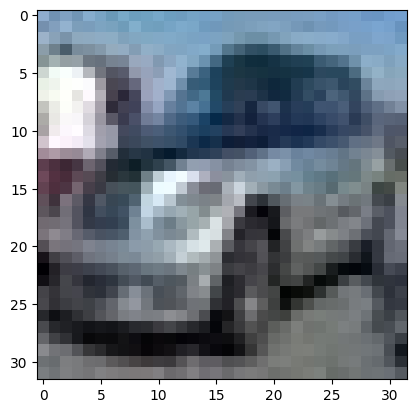

In [10]:
plt.imshow(X_train[0])

In [11]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [12]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [13]:
print(len(X_train))
print(len(Y_train))

100831
100831


In [14]:
model=models.Sequential([
        layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',strides = 2,activation='relu',input_shape=(32,32,3)),    
        layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.25)),
        layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
        layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.2)),
        layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
        layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
        layers.MaxPool2D((2,2)),
        layers.Dropout((0.2)),
    
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32,activation='relu'),
        layers.Dropout(0.2),
    
        layers.Dense(2,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,674 (354.20 KB)

 Trainable params: 90,674 (354.20 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step - accuracy: 0.7317 - loss: 0.5112
Epoch 2/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.8796 - loss: 0.2952
Epoch 3/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.9000 - loss: 0.2498
Epoch 4/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9111 - loss: 0.2247
Epoch 5/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9183 - loss: 0.2107
Epoch 6/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9206 - loss: 0.2042
Epoch 7/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9257 - loss: 0.1912
Epoch 8/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9278 - loss: 0.1852
Epoch 9/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9285 - loss: 0.1847
Epoch 10/10
3151/3151 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9301 - loss: 0.1800


In [16]:
model.save("Model.h5")

In [17]:
test = tf.keras.utils.image_dataset_from_directory('/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test', image_size=(32, 32))

Found 20000 files belonging to 2 classes.


In [18]:
test_data = []
for pic,num in test:
    for j in range(32):
        test_data.append([pic[j],num[j]])


In [19]:
X_test = []
Y_test = []
for val in test_data:
    X_test.append(val[0]/255)
    Y_test.append(val[1])

In [20]:
len(X_test)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [21]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
Y_Pred=[]
for i in range(len(y_pred)):
    y_hat=np.argmax(y_pred[i])
    Y_Pred.append(y_hat)
print(classification_report(Y_test,Y_Pred))

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10000
           1       0.92      0.95      0.94     10000

    accuracy                           0.93     20000
   macro avg       0.94      0.93      0.93     20000
weighted avg       0.94      0.93      0.93     20000

